In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [155]:
#ticker
ticker_symbol = "AAPL"

In [156]:
#Get data
ticker = yf.Ticker(ticker_symbol)
data = ticker.history(period="max")

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
1980-12-12 00:00:00-05:00    0.098485    0.098913    0.098485    0.098485   
1980-12-15 00:00:00-05:00    0.093775    0.093775    0.093347    0.093347   
1980-12-16 00:00:00-05:00    0.086924    0.086924    0.086495    0.086495   
1980-12-17 00:00:00-05:00    0.088636    0.089064    0.088636    0.088636   
1980-12-18 00:00:00-05:00    0.091206    0.091634    0.091206    0.091206   
...                               ...         ...         ...         ...   
2025-10-15 00:00:00-04:00  249.490005  251.820007  247.470001  249.339996   
2025-10-16 00:00:00-04:00  248.250000  249.039993  245.130005  247.449997   
2025-10-17 00:00:00-04:00  248.020004  253.380005  247.270004  252.289993   
2025-10-20 00:00:00-04:00  255.889999  264.380005  255.630005  262.239990   
2025-10-21 00:00:00-04:00  261.880005  265.290009  261.880005  262.769989   

In [157]:
#Predicting whether the stock price will go up or down in 7 days
data["7Days"]=data["Close"].shift(-7)

#Create target variable
data["Target"]=(data["7Days"]>data["Close"]).astype(int)


data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7Days,Target
Date,,,,,,,,,
1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,0.0,0.0,0.105764,1
1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,0.0,0.0,0.111331,1
1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,0.0,0.0,0.121607,1
1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,0.0,0.0,0.123320,1
1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,0.0,0.0,0.120323,1


# Exploratory Data Analysis

In [158]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7Days,Target
count,11306.000000,11306.000000,11306.000000,11306.000000,1.130600e+04,11306.000000,11306.000000,11299.000000,11306.000000
mean,26.907710,27.201216,26.632512,26.930161,3.108778e+08,0.000844,0.001504,26.946787,0.539890
std,55.643785,56.249136,55.091637,55.702132,3.336688e+08,0.012758,0.082516,55.715378,0.498428
min,0.038109,0.038109,0.037681,0.037681,0.000000e+00,0.000000,0.000000,0.037681,0.000000
25%,0.245347,0.251318,0.240166,0.245425,1.075478e+08,0.000000,0.000000,0.245675,0.000000
50%,0.468070,0.477739,0.461632,0.469748,1.996344e+08,0.000000,0.000000,0.471166,1.000000
75%,21.098528,21.240186,20.891829,21.079072,3.908464e+08,0.000000,0.000000,21.098574,1.000000
max,261.880005,265.290009,261.880005,262.769989,7.421641e+09,0.260000,7.000000,262.769989,1.000000


Apple stock closing price ranged from 0.03 to 262.77

Volume has a minimum of 0 to 7.4 e^9

Mean of target is .58 meaning that the target variable is pretty balanced

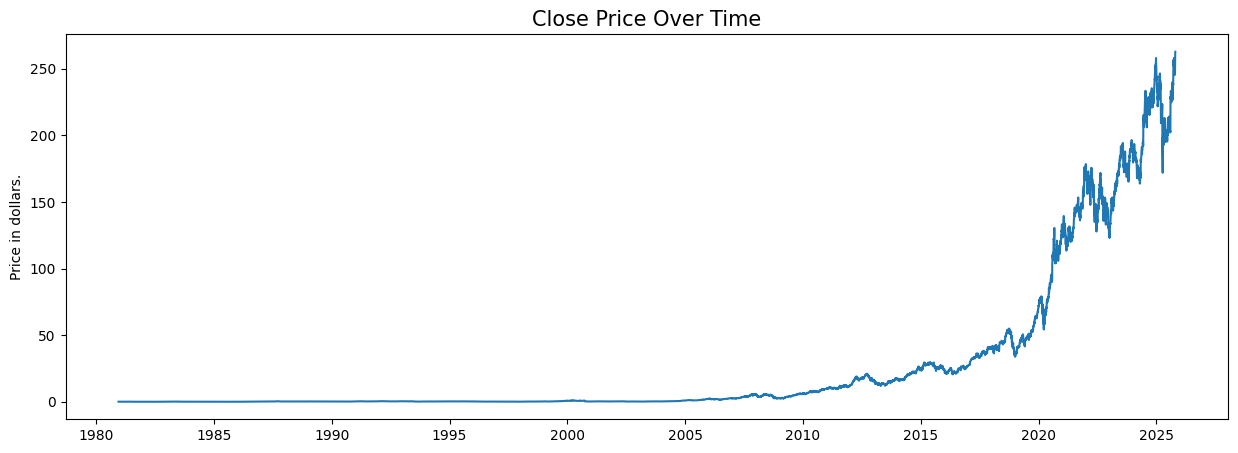

In [159]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Close Price Over Time', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

# Machine Learning

In [160]:
#Define features for ML and Target Variables
features = data[["Open", "High", "Low", "Close", "Volume"]]
target = data['Target']

features_scaled = StandardScaler().fit_transform(features)

In [161]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (9044, 5)
Testing set shape: (2262, 5)


In [162]:
#Create Random Forest Model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [163]:
#Model make predictions
predict = model.predict(X_test)

In [164]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.5932802829354553
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1026
           1       0.63      0.63      0.63      1236

    accuracy                           0.59      2262
   macro avg       0.59      0.59      0.59      2262
weighted avg       0.59      0.59      0.59      2262

Confusion Matrix:
[[563 463]
 [457 779]]


In [165]:
#Test Logistic Regression Model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [166]:
#Make predictions
predict2 = model2.predict(X_test)

In [167]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict2)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict2)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict2)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.5464190981432361
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1026
           1       0.55      1.00      0.71      1236

    accuracy                           0.55      2262
   macro avg       0.27      0.50      0.35      2262
weighted avg       0.30      0.55      0.39      2262

Confusion Matrix:
[[   0 1026]
 [   0 1236]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [168]:
#Create SVM Model
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

SVC()

In [169]:
#Make predictions
predict3 = model3.predict(X_test)

In [170]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict3)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict3)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict3)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.5618921308576481
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.32      0.40      1026
           1       0.57      0.76      0.66      1236

    accuracy                           0.56      2262
   macro avg       0.55      0.54      0.53      2262
weighted avg       0.55      0.56      0.54      2262

Confusion Matrix:
[[330 696]
 [295 941]]


In [171]:
#XGBoost
model4 = XGBClassifier()
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [172]:
predict4 = model4.predict(X_test)

In [173]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict4)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict4)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict4)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.581343943412909
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      1026
           1       0.61      0.65      0.63      1236

    accuracy                           0.58      2262
   macro avg       0.58      0.57      0.57      2262
weighted avg       0.58      0.58      0.58      2262

Confusion Matrix:
[[514 512]
 [435 801]]


Next 7 days Prediction Using XGBoost

In [178]:
last_day_data = data.tail(1)
print(last_day_data)

                                 Open        High         Low       Close  \
Date                                                                        
2025-10-21 00:00:00-04:00  261.880005  265.290009  261.880005  262.769989   

                             Volume  Dividends  Stock Splits  7Days  Target  
Date                                                                         
2025-10-21 00:00:00-04:00  46374267        0.0           0.0    NaN       0  


In [179]:
new_features = last_day_data[["Open", "High", "Low", "Close", "Volume"]]
new_features_scaled = StandardScaler().fit_transform(new_features)
predict4 = model4.predict(new_features_scaled)
print(predict4)

[1]


The prediction is that the stock price will go up in the next 7 days